In [1]:

import sys
sys.path = ['D:\\Coding\py\\IPython Notebooks\\experiment\\lazyEEG_dist\\']+sys.path 
import lazyEEG
# epochs = lazyEEG.io.load_epochs('d:/test.h5')
epochs = lazyEEG.io.load_epochs('D:/Coding/py/IPython Notebooks/experiment/chunking/data/epoches_0124.h5',compress=False)
epochs.info['conditions']['format'] = '(global)(local)(target)'

C:\app\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


lazyEEG loaded
reading 24
reading 25
reading 26
reading 27
reading 30
reading 32
reading 33
reading 35
reading 36
reading 37
reading 38
reading 39
reading 40
reading 42
reading 43
reading 44
Concatenated.


In [1]:

import sys
sys.path = ['D:\\Coding\py\\IPython Notebooks\\experiment\\lazyEEG_dist\\']+sys.path 
import lazyEEG

C:\app\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


lazyEEG loaded


In [20]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.utils import to_categorical
from sklearn.metrics import roc_auc_score

def run_model(X, Y, train_index, test_index, extra_params):
    input_dim = X[train_index].shape[1]
    nb_classes = 2

    model = Sequential()
    model.add(Dense(nb_classes, input_dim=input_dim, activation='softmax'))

    model.compile(optimizer='sgd', loss='categorical_crossentropy')
    history = model.fit(X[train_index], to_categorical(Y[train_index], nb_classes), 
                        nb_epoch=1, verbose=0)

    prob_train = model.predict_proba(X[train_index])[:,1]
    prob_test = model.predict_proba(X[test_index])[:,1]

    score_train = roc_auc_score(Y[train_index],prob_train)
    score_test = roc_auc_score(Y[test_index],prob_test)

    return score_train, score_test

script = {'conditions': 'T vs F:TfR&TtL', 'timepoints': '0~20'}
e = epochs.extract(script)

c = e.classification(win_size='10ms', run_model=run_model, fold=10)

100% 2/2 [36:46<00:00, 1103.06s/it]


In [23]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.utils import to_categorical
from sklearn.metrics import roc_auc_score

def run_model(X, Y, train_index, test_index, extra_params):
    input_dim = X[train_index].shape[1]
    nb_classes = 2

    model = Sequential()
    model.add(Dense(1, input_dim=input_dim, activation='sigmoid'))

    model.compile(optimizer='rmsprop', loss='binary_crossentropy')
    history = model.fit(X[train_index], Y[train_index], 
                        nb_epoch=1, verbose=1)

    prob_train = model.predict_proba(X[train_index])
    prob_test = model.predict_proba(X[test_index])

    score_train = roc_auc_score(Y[train_index],prob_train)
    score_test = roc_auc_score(Y[test_index],prob_test)

    return score_train, score_test

script = {'conditions': 'T vs F:TfR&TtL', 'timepoints': '0~20'}
e = epochs.extract(script)

c = e.classification(win_size='10ms', run_model=run_model, fold=1)

  0% 0/2 [00:00<?, ?it/s]

Epoch 1/1
47/47 [==============================]32/47 [===================>..........] - ETA: 3s - loss: 2.27247/47 [==============================] - 8s 173ms/step - loss: 1.9618

Epoch 1/1
55/55 [==============================]32/55 [================>.............] - ETA: 5s - loss: 1.15155/55 [==============================] - 8s 146ms/step - loss: 1.4178

Epoch 1/1
44/44 [==============================]32/44 [====================>.........] - ETA: 3s - loss: 1.30744/44 [==============================] - 8s 185ms/step - loss: 1.2349

Epoch 1/1
39/39 [==============================]32/39 [=======================>......] - ETA: 1s - loss: 1.56039/39 [==============================] - 8s 216ms/step - loss: 1.7474

Epoch 1/1
42/42 [==============================]32/42 [=====================>........] - ETA: 2s - loss: 3.80342/42 [==============================] - 8s 199ms/step - loss: 3.6848

Epoch 1/1
39/39 [==============================]32/39 [=======================>......] - ETA: 1

 50% 1/2 [03:30<03:30, 210.18s/it]

Epoch 1/1
47/47 [==============================]32/47 [===================>..........] - ETA: 4s - loss: 2.14947/47 [==============================] - 10s 202ms/step - loss: 2.1189

Epoch 1/1
55/55 [==============================]32/55 [================>.............] - ETA: 6s - loss: 1.10655/55 [==============================] - 9s 159ms/step - loss: 1.1569

Epoch 1/1
44/44 [==============================]32/44 [====================>.........] - ETA: 3s - loss: 1.19444/44 [==============================] - 9s 206ms/step - loss: 1.0988

Epoch 1/1
39/39 [==============================]32/39 [=======================>......] - ETA: 1s - loss: 1.30539/39 [==============================] - 9s 222ms/step - loss: 1.3151

Epoch 1/1
42/42 [==============================]32/42 [=====================>........] - ETA: 2s - loss: 2.89142/42 [==============================] - 9s 204ms/step - loss: 2.5819

Epoch 1/1
39/39 [==============================]32/39 [=======================>......] - ETA: 

100% 2/2 [07:02<00:00, 211.14s/it]


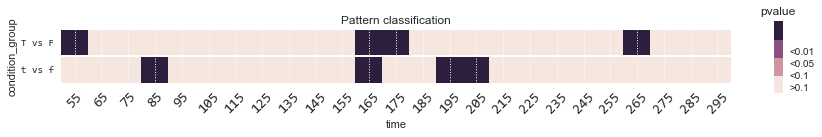

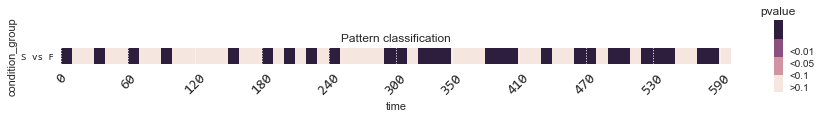

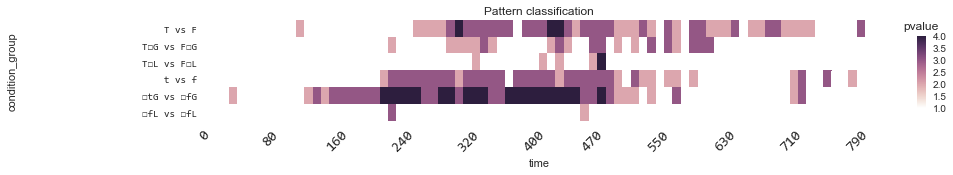

In [26]:
lazyEEG.reload()
c1 = lazyEEG.io.load_AnalyzedData(r'D:\lab\lazyEEG_paper\c_cnn_10ms.pickle')
c2 = lazyEEG.io.load_AnalyzedData(r'D:\lab\lazyEEG_paper\c_cnn_10ms (2).pickle')
c3 = lazyEEG.io.load_AnalyzedData(r'D:\lab\lazyEEG_paper\c_10ms_20f.pickle')


c1.correct().plot()
c2.correct().plot()
c3.correct().plot()

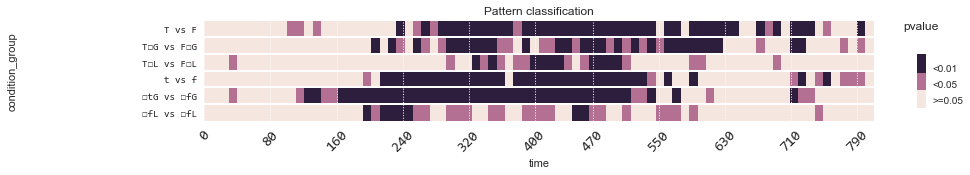

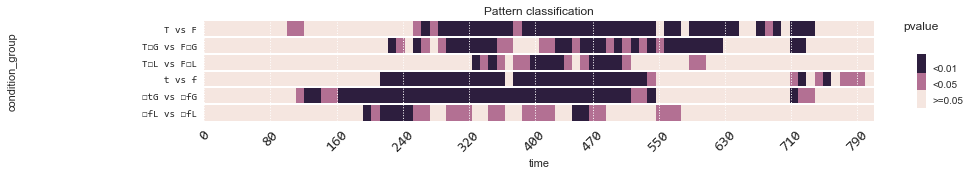

In [104]:
lazyEEG.reload()

c2 = lazyEEG.io.load_AnalyzedData(r'D:\lab\lazyEEG_paper\c_cnn2_10ms_all.pickle')

c2.default_plot_params['re_assign'] = [(0,0.01,0.05,1),(4,3,2)]
c2.default_plot_params['cbar_values'] = ['>=0.05','<0.05','<0.01']
c2.plot()
c2.correct(method='smooth').plot()

In [96]:
c2.data[0] = c2.correct(method='smooth').data[0].ix[3:4]
c2.data[0].name = name

time
5      0.244
15     0.704
25     0.118
35     0.082
45     0.874
55     0.804
65     0.974
75     0.326
85     0.968
95     0.212
105    0.420
115    0.492
125    0.448
135    0.234
145    0.802
155    0.780
165    0.676
175    0.428
185    0.560
195    0.028
205    0.050
215    0.000
225    0.000
235    0.000
245    0.000
255    0.000
265    0.000
275    0.000
285    0.006
295    0.000
       ...  
505    0.002
515    0.000
525    0.008
535    0.024
545    0.088
555    0.050
565    0.062
575    0.770
585    0.050
595    0.728
605    0.114
615    0.370
625    0.954
635    0.168
645    0.392
655    0.114
665    0.698
675    0.372
685    0.072
695    0.332
705    0.018
715    0.002
725    0.152
735    0.016
745    0.008
755    0.352
765    0.040
775    0.012
785    0.044
795    0.724
Name: 0                       t vs f, Length: 80, dtype: float64
time
5      2
15     2
25     2
35     2
45     2
55     2
65     2
75     2
85     2
95     2
105    2
115    2
125    2
135    2
145   

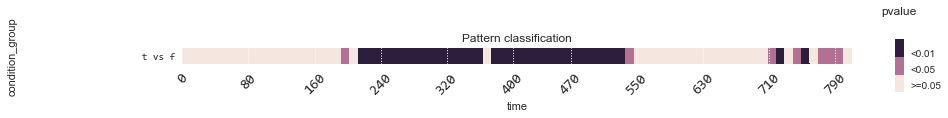

In [100]:
lazyEEG.reload()
c2.plot()

In [92]:
name = c2.correct(method='smooth').data[0].name

[0.         0.16666667 0.33333333 0.5        0.66666667 0.83333333
 1.        ]
[0.08333333333333333, 0.25, 0.41666666666666663, 0.5833333333333333, 0.75, 0.9166666666666667]


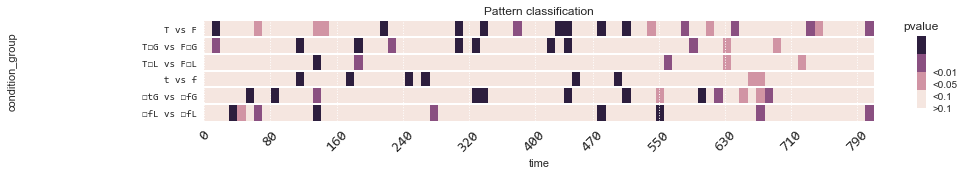

[0.         0.16666667 0.33333333 0.5        0.66666667 0.83333333
 1.        ]
[0.08333333333333333, 0.25, 0.41666666666666663, 0.5833333333333333, 0.75, 0.9166666666666667]


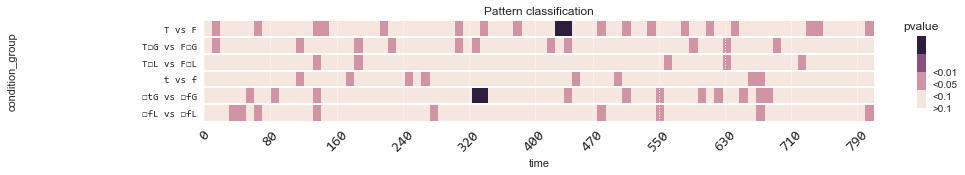

[0.         0.16666667 0.33333333 0.5        0.66666667 0.83333333
 1.        ]
[0.08333333333333333, 0.25, 0.41666666666666663, 0.5833333333333333, 0.75, 0.9166666666666667]


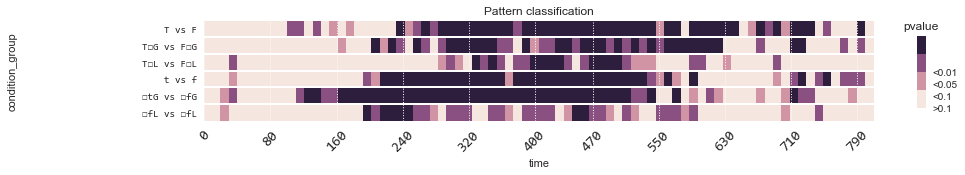

[0.         0.16666667 0.33333333 0.5        0.66666667 0.83333333
 1.        ]
[0.08333333333333333, 0.25, 0.41666666666666663, 0.5833333333333333, 0.75, 0.9166666666666667]


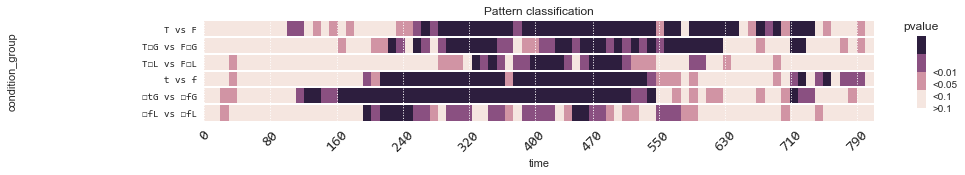

In [76]:
lazyEEG.reload()
c1 = lazyEEG.io.load_AnalyzedData(r'D:\lab\lazyEEG_paper\c_cnn_10ms_all.pickle')
c2 = lazyEEG.io.load_AnalyzedData(r'D:\lab\lazyEEG_paper\c_cnn2_10ms_all.pickle')

# c1.default_plot_params['re_assign'] = [(0,0.01,0.05,1),(4,3,2)]
# c1.default_plot_params['cbar_values'] = ['<0.1','<0.05','<0.01']
c1.plot()
# c1.correct().plot()
c1.correct(method='smooth').plot()

# c2.default_plot_params['re_assign'] = [(0,0.01,0.05,1),(4,3,2)]
# c2.default_plot_params['cbar_values'] = ['<0.1','<0.05','<0.01']
c2.plot()
# c2.correct().plot()
c2.correct(method='smooth').plot()

In [68]:
1>=0

True

In [63]:
c1.correct(method='smooth').data

[time                                  5      15     25     35     45     55   \
 condition_group                                                                
 0 T vs F                            0.382  0.050  0.650  0.720  0.518  0.628   
 0                       T□G vs F□G  0.486  0.050  0.378  0.222  0.944  0.608   
 0                       T□L vs F□L  0.452  0.300  0.348  0.850  0.576  0.712   
 0                       t vs f      0.554  0.228  0.562  0.814  0.830  0.560   
 0                       □tG vs □fG  0.518  0.630  0.848  0.356  0.250  0.050   
 0                       □fL vs □fL  0.178  0.654  0.674  0.050  0.080  0.580   
 
 time                                  65     75     85     95   ...      705  \
 condition_group                                                 ...            
 0 T vs F                            0.050  0.384  0.212  0.432  ...    0.620   
 0                       T□G vs F□G  0.804  0.494  0.470  0.650  ...    0.708   
 0                       T

In [64]:
c1.data

[time                                  5      15     25        35     45   \
 condition_group                                                            
 0 T vs F                            0.382  0.002  0.650  0.720000  0.518   
 0                       T□G vs F□G  0.486  0.014  0.378  0.222000  0.944   
 0                       T□L vs F□L  0.452  0.300  0.348  0.850000  0.576   
 0                       t vs f      0.554  0.228  0.562  0.814000  0.830   
 0                       □tG vs □fG  0.518  0.630  0.848  0.356000  0.250   
 0                       □fL vs □fL  0.178  0.654  0.674  0.000001  0.080   
 
 time                                  55     65     75        85     95   \
 condition_group                                                            
 0 T vs F                            0.628  0.050  0.384  0.212000  0.432   
 0                       T□G vs F□G  0.608  0.804  0.494  0.470000  0.650   
 0                       T□L vs F□L  0.712  0.668  0.456  0.752000  0.126 

In [55]:

level = 0.05

v = np.concatenate(([1],v,[1]))

for idx in range(1,len(v)-1):
    if v[idx] < level and v[idx-1] > level and v[idx+1] > level:
        v[idx] = level
print(v[1:-1])

[8.02e-01 3.30e-01 8.52e-01 4.54e-01 1.06e-01 1.70e-01 2.98e-01 2.80e-01
 9.12e-01 9.60e-01 3.40e-02 2.00e-02 3.20e-01 5.00e-02 1.98e-01 6.80e-02
 1.62e-01 9.20e-02 6.00e-01 9.28e-01 4.38e-01 2.94e-01 1.78e-01 5.00e-02
 7.00e-02 1.60e-02 6.00e-03 1.60e-02 2.00e-03 1.00e-06 1.00e-06 1.00e-06
 1.00e-06 1.00e-06 1.00e-06 2.00e-03 1.00e-06 2.40e-02 1.00e-06 1.00e-06
 1.00e-06 1.00e-06 1.00e-06 1.00e-06 4.00e-03 1.00e-06 1.00e-06 1.00e-06
 1.00e-06 1.00e-06 1.00e-06 1.00e-06 1.00e-06 2.00e-03 5.60e-02 1.00e-06
 2.00e-03 1.02e-01 1.00e-06 1.00e-06 1.00e-06 2.00e-03 2.00e-03 1.00e-06
 1.92e-01 7.40e-02 1.00e-06 1.20e-02 1.00e-06 5.00e-02 6.00e-03 6.00e-03
 4.00e-03 2.18e-01 5.00e-02 2.84e-01 1.58e-01 1.42e-01 5.00e-02 1.96e-01]


In [47]:
import numpy as np


array([1.00e+00, 8.02e-01, 3.30e-01, 8.52e-01, 4.54e-01, 1.06e-01,
       1.70e-01, 2.98e-01, 2.80e-01, 9.12e-01, 9.60e-01, 3.40e-02,
       2.00e-02, 3.20e-01, 1.80e-02, 1.98e-01, 6.80e-02, 1.62e-01,
       9.20e-02, 6.00e-01, 9.28e-01, 4.38e-01, 2.94e-01, 1.78e-01,
       4.00e-03, 7.00e-02, 1.60e-02, 6.00e-03, 1.60e-02, 2.00e-03,
       1.00e-06, 1.00e-06, 1.00e-06, 1.00e-06, 1.00e-06, 1.00e-06,
       2.00e-03, 1.00e-06, 2.40e-02, 1.00e-06, 1.00e-06, 1.00e-06,
       1.00e-06, 1.00e-06, 1.00e-06, 4.00e-03, 1.00e-06, 1.00e-06,
       1.00e-06, 1.00e-06, 1.00e-06, 1.00e-06, 1.00e-06, 1.00e-06,
       2.00e-03, 5.60e-02, 1.00e-06, 2.00e-03, 1.02e-01, 1.00e-06,
       1.00e-06, 1.00e-06, 2.00e-03, 2.00e-03, 1.00e-06, 1.92e-01,
       7.40e-02, 1.00e-06, 1.20e-02, 1.00e-06, 5.00e-02, 6.00e-03,
       6.00e-03, 4.00e-03, 2.18e-01, 3.80e-02, 2.84e-01, 1.58e-01,
       1.42e-01, 1.00e-06, 1.96e-01, 1.00e+00])

100% 401/401 [00:01<00:00, 220.53it/s]
100% 401/401 [00:01<00:00, 224.16it/s]
100% 401/401 [00:01<00:00, 235.47it/s]
100% 401/401 [00:01<00:00, 232.44it/s]
100% 401/401 [00:01<00:00, 232.90it/s]


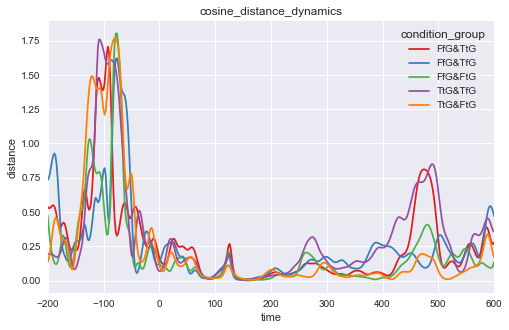

In [70]:
script = [{'conditions': 'FfG&TtG,FfG&TfG,FfG&FtG,TtG&TfG,TtG&FtG',
                      'timepoints': '-200~600'}]
e = epochs.extract(script)
t = e.cosine_distance_dynamics()
t.plot()

In [72]:
t.data[0]

0                                                    \
time                 -200      -198      -196      -194      -192      -190   
condition_group                                                               
0 FfG&TtG        0.538313  0.528212  0.528646  0.536864  0.546568  0.550022   
0 FfG&TfG        0.734019  0.747174  0.781670  0.828672  0.876594  0.913363   
0 FfG&FtG        0.477617  0.380165  0.298615  0.235229  0.187823  0.153699   
0 TtG&TfG        0.197239  0.193078  0.192548  0.192736  0.191312  0.187131   
0 TtG&FtG        0.135205  0.160529  0.205039  0.264228  0.329720  0.391014   

                                                           ...               \
time                 -188      -186      -184      -182    ...          582   
condition_group                                            ...                
0 FfG&TtG        0.540598  0.515182  0.476222  0.432774    ...     0.344817   
0 FfG&TfG        0.927303  0.907515  0.845078  0.736891    ...     0.312255   
0 FfG&FtG        0.131348  0.120379  0.121679  0.137916    ...     0.121626   
0 TtG&TfG        0.180659  0.174052  0.170439  0.172518    ...     0.400929   
0 TtG&FtG        0.437242  0.459888  0.455823  0.428832    ...     0.258388   

                                                                             \
time                  584       586       588       590       592       594   
condition_group                                                               
0 FfG&TtG        0.376667  0.389830  0.383712  0.361903  0.330938  0.299100   
0 FfG&TfG        0.379132  0.440784  0.490517  0.524724  0.541973  0.542384   
0 FfG&FtG        0.114605  0.108374  0.103202  0.098621  0.094560  0.092393   
0 TtG&TfG        0.424525  0.443374  0.453321  0.451219  0.436230  0.411420   
0 TtG&FtG        0.297330  0.325886  0.337880  0.331349  0.308467  0.274388   

                                               
time                  596       598       600  
condition_group                                
0 FfG&TtG        0.275147  0.266460  0.276760  
0 FfG&TfG        0.527921  0.502498  0.470570  
0 FfG&FtG        0.095465  0.108689  0.137034  
0 TtG&TfG        0.384307  0.364154  0.356540  
0 TtG&FtG        0.235750  0.199429  0.171606  

[5 rows x 401 columns]

In [68]:
c2.data[0]

0                                                        \
time               55    65     75     85     95    105    115    125    135   
condition_group                                                                
0 T vs F         0.000  0.77  0.846  0.996  0.758  0.77  0.298  0.152  0.776   
0 t vs f         0.152  0.08  0.276  0.000  0.528  0.96  0.044  0.212  0.882   

                        ...                                                    \
time               145  ...      205   215    225    235    245    255    265   
condition_group         ...                                                     
0 T vs F         0.228  ...    0.864  0.13  0.984  0.336  0.334  0.234  0.000   
0 t vs f         0.928  ...    0.000  0.60  0.792  0.988  0.974  0.334  0.798   

                                      
time               275    285    295  
condition_group                       
0 T vs F         0.114  0.994  0.866  
0 t vs f         0.090  0.454  0.498  

[2 rows x 25 columns]

In [69]:
c1.data[0]

time,5,15,25,35,45,55,65,75,85,95,...,705,715,725,735,745,755,765,775,785,795
condition_group,,,,,,,,,,,,,,,,,,,,,
0 T vs F,0.792277,0.566825,0.883628,0.512609,0.283469,0.227844,0.211028,0.257293,0.855075,0.963414,...,0.007519,0.005758,0.004135,0.048508,0.095011,0.305671,0.218282,0.081236,0.002051,0.083554
0 T□G vs F□G,0.793187,0.576937,0.936278,0.647640,0.337230,0.844904,0.293788,0.382519,0.836578,0.972530,...,0.030437,0.095094,0.172582,0.673092,0.361063,0.086819,0.018593,0.149865,0.024949,0.301035
0 T□L vs F□L,0.169134,0.995195,0.462130,0.030536,0.404117,0.294434,0.482312,0.361865,0.990736,0.711018,...,0.689869,0.317153,0.547577,0.984262,0.771388,0.184295,0.915813,0.290547,0.694088,0.036615
0 t vs f,0.120024,0.539747,0.076890,0.301750,0.925976,0.652771,0.860154,0.121606,0.935542,0.412382,...,0.013716,0.002880,0.116082,0.044365,0.002432,0.465623,0.034481,0.005618,0.032541,0.564021
0 □tG vs □fG,0.415293,0.957811,0.058838,0.013252,0.887087,0.867429,0.414720,0.831874,0.873249,0.721681,...,0.019491,0.002523,0.263547,0.066856,0.101453,0.279734,0.136577,0.046389,0.050523,0.329279
0 □fL vs □fL,0.722059,0.372754,0.336960,0.267383,0.732737,0.418302,0.748527,0.364217,0.750437,0.978078,...,0.156655,0.098524,0.244010,0.073304,0.055371,0.805188,0.647410,0.383043,0.556060,0.718520


In [60]:
c2.default_plot_params

{'cbar_title': 'pvalue',
 'color': <matplotlib.colors.ListedColormap at 0x265ce36ceb8>,
 'plot_type': ['direct', 'heatmap'],
 're_assign': [(0, 0.001, 0.01, 0.05, 1), (4, 3, 2, 1)],
 'title': 'Pattern classification',
 'x_len': 12,
 'x_title': 'time',
 'y_title': 'condition_group'}

In [7]:
import numpy as np
import scipy
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.utils import to_categorical
from tensorflow.python.keras.layers import Reshape, MaxPooling2D, Conv2D, Dense, Flatten
from tensorflow.python.keras.optimizers import Adam
from sklearn.metrics import roc_auc_score
from lazyEEG.graph.figure_unit import get_topograph

def reshape_X(X, extra_params):
    N = 20
    locs = epochs.info['xy_locs']
    channels = X[0].columns.get_level_values('channel')
    
    X = np.array([get_topograph(i, locs, channels, N) for i in X])
    return X
    
def run_model(X, Y, train_index, test_index, extra_params):
    img_size = 20
    
    model = Sequential()
    
    model.add(Reshape((img_size, img_size, 1), input_shape=(img_size, img_size)))
    
    model.add(Conv2D(kernel_size=5, strides=1, filters=16, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=2, strides=2))
    
    model.add(Conv2D(kernel_size=5, strides=1, filters=36, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=2, strides=2))
    
    # Flatten the 4-rank output of the convolutional layers to 2-rank that can be input to a fully-connected / dense layer.
    model.add(Flatten())
    
    model.add(Dense(128, activation='relu'))
    
    # Last fully-connected / dense layer with softmax-activation .
    model.add(Dense(2, activation='softmax')) # for use in classification
    
    model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1e-2))
    
    model.fit(x=X[train_index], y=to_categorical(Y)[train_index], batch_size=30, epochs=1, verbose=0)

    prob_train = model.predict_proba(X[train_index])[:,1]
    prob_test = model.predict_proba(X[test_index])[:,1]

    score_train = roc_auc_score(Y[train_index],prob_train)
    score_test = roc_auc_score(Y[test_index],prob_test)
    
    return score_train, score_test

script = {'conditions': 'T vs F:TfR&TtL', 'timepoints': '0~20'}
e = epochs.extract(script)

e.classification(win_size='10ms', reshape_X_method=reshape_X, run_model=run_model, fold=1)

100% 2/2 [02:01<00:00, 60.82s/it]


In [6]:
t1.data

[                        0         
 time                   5        15
 condition_group                   
 0 T vs F         0.466229  0.95673]

In [5]:
from tensorflow.python import keras

In [8]:
lazyEEG.reload(lazyEEG.algorithms.classification_models)
script = [{'conditions': 'T vs F:TfR&TtL',
                      'timepoints': '0~20'}]
e = epochs.extract(script)

t1 = e.classification(win_size='10ms',fold=10)

100% 2/2 [00:01<00:00,  1.40it/s]


In [2]:
lazyEEG.reload(lazyEEG.algorithms.classification_models)

In [7]:
t1 = lazyEEG.io.load_AnalyzedData(r'D:\lab\lazyEEG_paper\t1.pickle')
t2 = lazyEEG.io.load_AnalyzedData(r'D:\lab\lazyEEG_paper\t2.pickle')